In [214]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [215]:
# downloading the dataset from kaggle
path = kagglehub.dataset_download("sampadab17/network-intrusion-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'network-intrusion-detection' dataset.
Path to dataset files: /kaggle/input/network-intrusion-detection


In [219]:
train = pd.read_csv(r"/root/.cache/kagglehub/datasets/sampadab17/network-intrusion-detection/versions/1/Train_data.csv")
test = pd.read_csv(r"/root/.cache/kagglehub/datasets/sampadab17/network-intrusion-detection/versions/1/Test_data.csv")

In [224]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# feature groups (FIXED: removed 'class')
non_numerical = ['protocol_type', 'service', 'flag']

numerical = [
    'duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

# split X / y FIRST (FIXED)
X = train.drop(columns=["class"])
y = train["class"].replace({"anomaly": 0, "normal": 1})

TEST_SIZE = 5000

X_train = X[:-TEST_SIZE]
X_test  = X[-TEST_SIZE:]
y_train = y[:-TEST_SIZE]
y_test  = y[-TEST_SIZE:]

# preprocessing (FIXED: fit only on train)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown="ignore"), non_numerical)
])

X_train = preprocessor.fit_transform(X_train)
X_test  = preprocessor.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(len(y_train), len(y_test))


(20192, 118)
(5000, 118)
20192 5000


/tmp/ipython-input-1240559770.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = train["class"].replace({"anomaly": 0, "normal": 1})


In [228]:
##define a simple classification dataset
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(118,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
  ])

model.compile(
    optimizer="rmsprop",
    loss='binary_crossentropy',  # use 'sparse_categorical_crossentropy' if labels are integers
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │        15,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,553 (92.00 KB)

 Trainable params: 23,553 (92.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9450 - loss: 0.1669 - val_accuracy: 0.9769 - val_loss: 0.0513
Epoch 2/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9868 - loss: 0.0457 - val_accuracy: 0.9868 - val_loss: 0.0378
Epoch 3/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9889 - val_loss: 0.0314
Epoch 4/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9898 - val_loss: 0.0323
Epoch 5/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9917 - loss: 0.0276 - val_accuracy: 0.9926 - val_loss: 0.0270
Epoch 6/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0191 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 7/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9914 - val_loss: 0.0291
Epoch 8/10
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9924 - loss: 0.0200 - val_accuracy: 0.

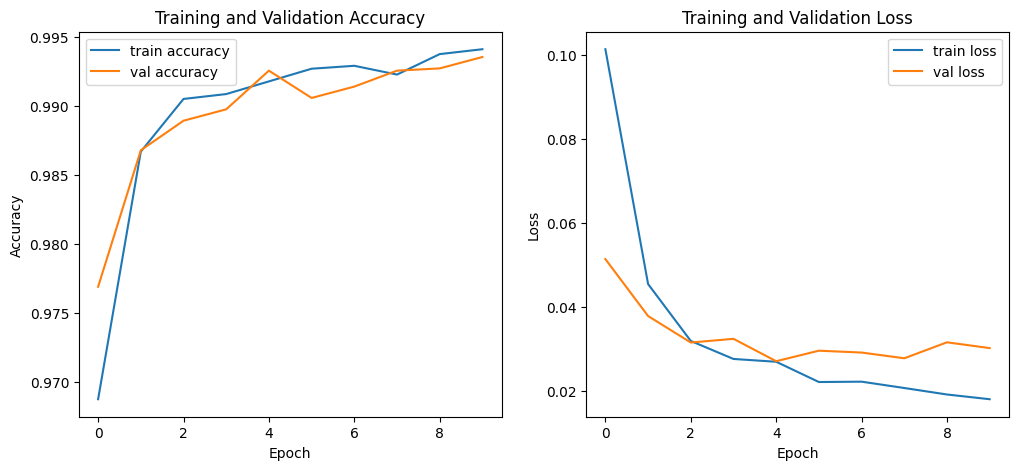

In [229]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [231]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9916 - loss: 0.0303
Test Loss: 0.0275
Test Accuracy: 0.9924
